In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA

from reading_data import *
from decoposition import *
from ts_plots import *

In [2]:
train = read_data("DailyDelhiClimateTrain.csv")
test = read_data("DailyDelhiClimateTest.csv")

ts_train= train["meantemp"]
ts_train.index = pd.to_datetime(ts_train.index)

ts_test = test["meantemp"]
ts_test.index = pd.to_datetime(ts_test.index)

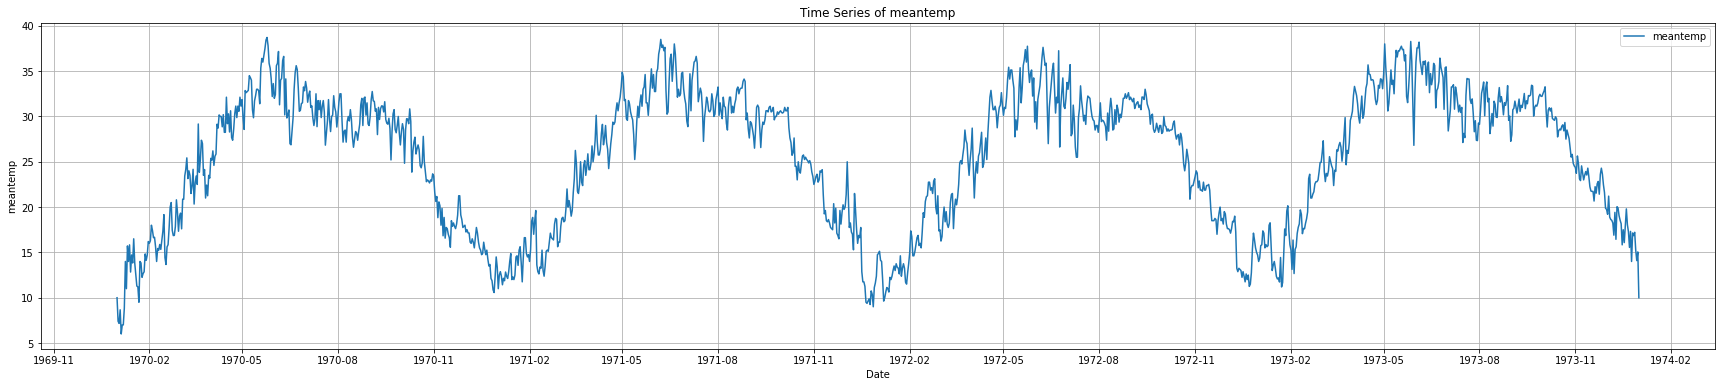

In [3]:
plot_time_series_data(train,col="meantemp")

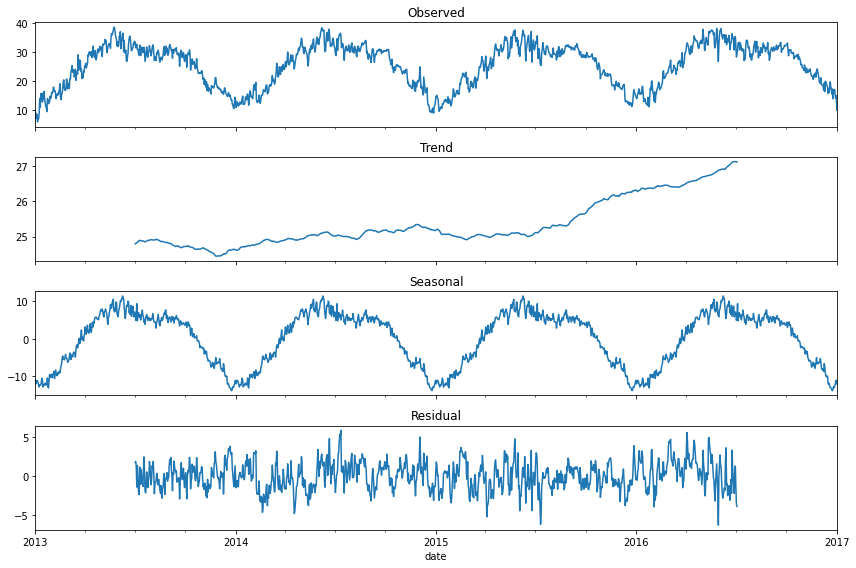

In [4]:
decomposed_signal = seasonality_decopositioin(train["meantemp"],period=365,plot=True)

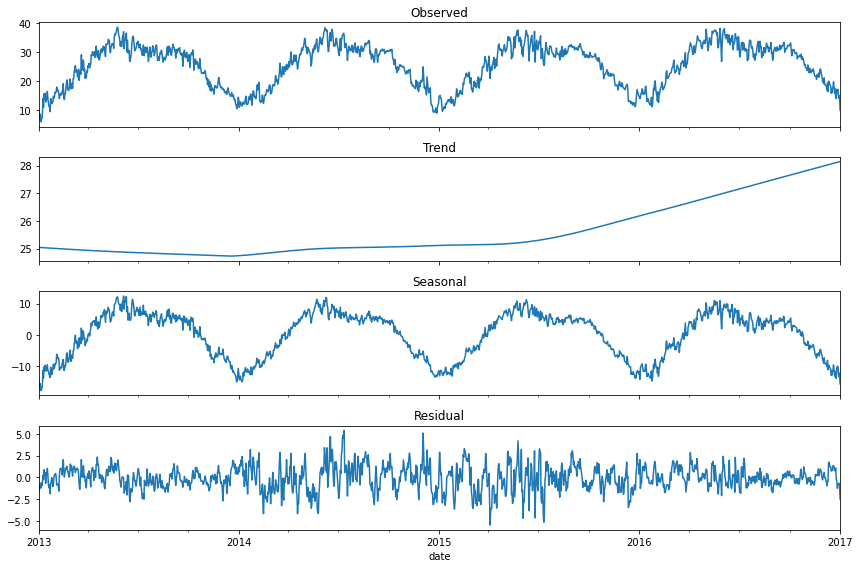

In [5]:
stl_result = stl_decopose(train["meantemp"],period=365,plot=True)

In [6]:
period= 365
n_forecast = 114

data_deseasonal = stl_result.resid + stl_result.trend
model = ARIMA(data_deseasonal.dropna(), order=(1,1,1))

fit = model.fit()
forecast_results = fit.get_forecast(steps=n_forecast)
forecast_data_deseasonal = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()


if(n_forecast< len(stl_result.seasonal)):
    
    start = len(stl_result.seasonal)-(period*(int(n_forecast/period)+1)+1)
    
    forecast_data_seasonal = stl_result.seasonal[start : start+n_forecast]
    forecast_data_seasonal.index = forecast_data_deseasonal.index
    print(start)
#else:
    
    
final_forecast = forecast_data_deseasonal + forecast_data_seasonal
conf_int['lower y'] = conf_int['lower y'] + forecast_data_seasonal
conf_int['upper y'] = conf_int['upper y'] + forecast_data_seasonal

final_forecast.index = pd.to_datetime(final_forecast.index)


C:\Karim\AnacondaInstallation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Karim\AnacondaInstallation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Karim\AnacondaInstallation\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Karim\AnacondaInstallation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Karim\AnacondaInstallation\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

1096


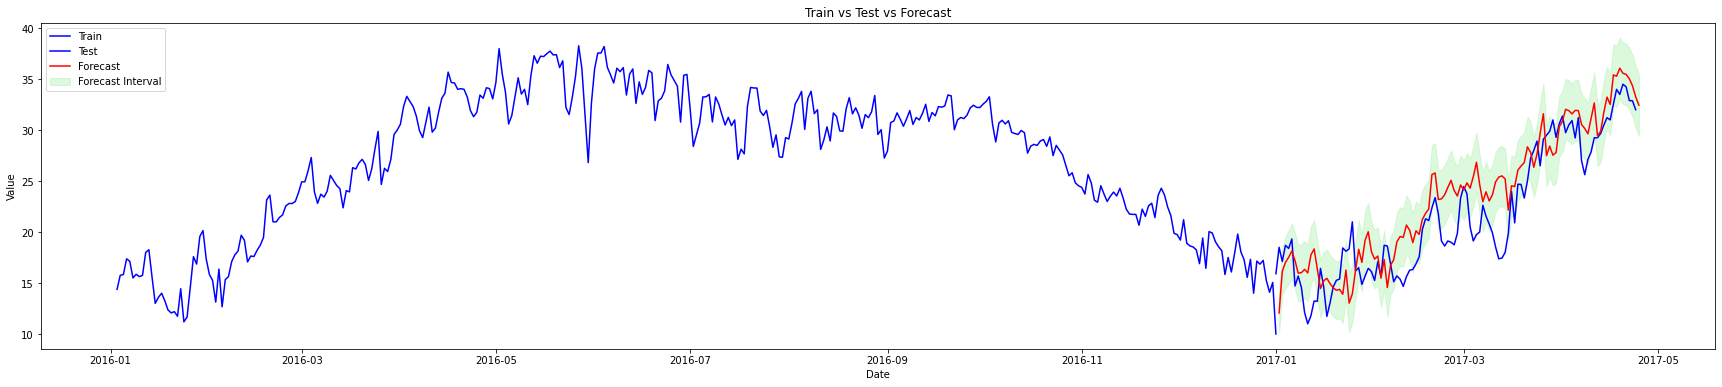

In [7]:
# Plot
plt.figure(figsize=(30,6))

# Plot training data
plt.plot( ts_train[-period:], label="Train", color="blue")

# Plot test data
plt.plot( ts_test, label="Test", color="blue")

# Plot forecast
plt.plot(final_forecast, label="Forecast", color="red")

# Plot confidence interval
plt.fill_between(
    conf_int.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color="lightgreen",
    alpha=0.3,
    label="Forecast Interval"
)

plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Train vs Test vs Forecast")
plt.legend()
plt.show()